# Utilities Consumption Study
# Water Notebook
### Sidclay da Silva
### July 2020
---

### Introduction

This notebook is part of a study which includes analysis of self water and electricity consumption, and the relation between consumption and the variation of local temperature and relative humidity.

A separate document will be developed with the complete analysis.

---

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The source for water consumption data was the monthly billing, which is based on water company monthly reading from the hydrometer. Data has been collected and stored in a local file in ```CSV``` format. The file contains the following data;

| |Column| Data type| Description|
|--:|:--|:--|:--|
|1|**period**| ```string``` in format *YYYY-MM*| Year and month of the billing reference|
|2|**previous_check_date**| ```string``` in format *DD/MM/YYYY*| Date of the previous consumption reading|
|3|**current_check_date**| ```string``` in format *DD/MM/YYYY*| Date of the current consumption reading|
|4|**previous_mark**|  ```integer```| Hydrometer indicator mark of previous consumption reading|
|5|**current_mark**| ```integer```| Hydrometer indicator mark of current consumption reading|
|6|**consumption_kwh**| ```integer``` | Water consumption in cubic meter (m<sup>3</sup>), difference between *current_mark* and *previous_mark*|

Read data from ```CSV``` file

In [2]:
# read CSV file form local folder
df_water = pd.read_csv('./Data_source/Data_Water.csv', sep=';', header=0)
df_water

,period,previous_check_date,current_check_date,previous_mark,current_mark,consumption_m3
0,2020-06,29/05/2020,30/06/2020,258,270,12
1,2020-05,30/04/2020,29/05/2020,247,258,11
2,2020-04,30/03/2020,30/04/2020,235,247,12
3,2020-03,28/02/2020,30/03/2020,221,235,14
4,2020-02,30/01/2020,28/02/2020,215,221,6
...,...,...,...,...,...,...
64,2015-02,31/01/2015,04/03/2015,69,81,12
65,2015-01,30/12/2014,31/01/2015,51,69,18
66,2014-12,02/12/2014,30/12/2014,35,51,16
67,2014-11,30/10/2014,02/12/2014,21,35,14


Entries are sorted in chronological descenting order from 2014-10 to 2020-06, the dataframe will be sorted in ascending oder.

The inicial period __2014-10__ will not be considered as the house was unoccupied for almost the whole month.

Columns *previous_check_date* and *current_check_date* will be renamed to be shortened.

In [3]:
# copy dataframe exlcuding last observation
df_water = df_water[:-1]

# sort dataframe in chronological ascending order
df_water = df_water.sort_values(by='period', ignore_index=True)

# rename columns
df_water = df_water.rename(columns={'previous_check_date': 'previous_check',
                                    'current_check_date': 'current_check'})
df_water

,period,previous_check,current_check,previous_mark,current_mark,consumption_m3
0,2014-11,30/10/2014,02/12/2014,21,35,14
1,2014-12,02/12/2014,30/12/2014,35,51,16
2,2015-01,30/12/2014,31/01/2015,51,69,18
3,2015-02,31/01/2015,04/03/2015,69,81,12
4,2015-03,04/03/2015,02/04/2015,81,97,16
...,...,...,...,...,...,...
63,2020-02,30/01/2020,28/02/2020,215,221,6
64,2020-03,28/02/2020,30/03/2020,221,235,14
65,2020-04,30/03/2020,30/04/2020,235,247,12
66,2020-05,30/04/2020,29/05/2020,247,258,11


Data in columns *previous_check* and *current_check* are in Brazilian standard format __DD/MM/YYYY__, date information is in ```string``` format and stored as ```object``` data type.

In [4]:
# check dataframe colunms data types
df_water.dtypes

period            object
previous_check    object
current_check     object
previous_mark      int64
current_mark       int64
consumption_m3     int64
dtype: object

Convert data in columns *previous_check* and *current_check* to ```datetime``` format.

In [5]:
# convert string date to datetime format
df_water['previous_check'] = pd.to_datetime(df_water['previous_check'], format='%d/%m/%Y')
df_water['current_check'] = pd.to_datetime(df_water['current_check'], format='%d/%m/%Y')

df_water

,period,previous_check,current_check,previous_mark,current_mark,consumption_m3
0,2014-11,2014-10-30,2014-12-02,21,35,14
1,2014-12,2014-12-02,2014-12-30,35,51,16
2,2015-01,2014-12-30,2015-01-31,51,69,18
3,2015-02,2015-01-31,2015-03-04,69,81,12
4,2015-03,2015-03-04,2015-04-02,81,97,16
...,...,...,...,...,...,...
63,2020-02,2020-01-30,2020-02-28,215,221,6
64,2020-03,2020-02-28,2020-03-30,221,235,14
65,2020-04,2020-03-30,2020-04-30,235,247,12
66,2020-05,2020-04-30,2020-05-29,247,258,11


Convert columns data type to ```datetime```.

In [6]:
# convert columns data type to datetime
df_water = df_water.astype({'previous_check': 'datetime64',
                            'current_check': 'datetime64'})
df_water.dtypes

period                    object
previous_check    datetime64[ns]
current_check     datetime64[ns]
previous_mark              int64
current_mark               int64
consumption_m3             int64
dtype: object

Column *period* contains the year and month information in format __YYYY-MM__. The informtation will be split into new columns *year* and *month*.

In [7]:
# create new columns year and month from column period
df_water['year'] = df_water['period'].str.slice(start=0, stop=4)
df_water['month'] = df_water['period'].str.slice(start=5, stop=7)

df_water

,period,previous_check,current_check,previous_mark,current_mark,consumption_m3,year,month
0,2014-11,2014-10-30,2014-12-02,21,35,14,2014,11
1,2014-12,2014-12-02,2014-12-30,35,51,16,2014,12
2,2015-01,2014-12-30,2015-01-31,51,69,18,2015,01
3,2015-02,2015-01-31,2015-03-04,69,81,12,2015,02
4,2015-03,2015-03-04,2015-04-02,81,97,16,2015,03
...,...,...,...,...,...,...,...,...
63,2020-02,2020-01-30,2020-02-28,215,221,6,2020,02
64,2020-03,2020-02-28,2020-03-30,221,235,14,2020,03
65,2020-04,2020-03-30,2020-04-30,235,247,12,2020,04
66,2020-05,2020-04-30,2020-05-29,247,258,11,2020,05


The checking day varies along the year, and the time in days between the checks is not always the same.

In [8]:
# check differencies in days between checks
(df_water['current_check'] - df_water['previous_check']).dt.days.unique()

array([33, 28, 32, 29, 30, 31, 34])

The time difference between checks varies from 28 to 34 days, and it has impact in consumption measure and billing. To have a balanced consumption measure three new columns will be created.

* *consumption_days*: time in days between checks $$\left( {current{\_}check}-{previous{\_}check} \right)$$
* *consumption_day_m3*: calculated water consumption per day $$\left( \frac{consumption{\_}m3}{consumption{\_}days} \right)$$
* *consumption_30d_m3*: estimated water consumption in 30 days $$\left( {consumption{\_}day{\_}m3} \times {30} \right)$$

In [9]:
# create new columns
df_water['consumption_days'] = (df_water['current_check'] - df_water['previous_check']).dt.days
df_water['consumption_day_m3'] = round(df_water['consumption_m3'] / df_water['consumption_days'], 3)
df_water['consumption_30d_m3'] = round(df_water['consumption_day_m3'] * 30, 3)

df_water

,period,previous_check,current_check,previous_mark,current_mark,consumption_m3,year,month,consumption_days,consumption_day_m3,consumption_30d_m3
0,2014-11,2014-10-30,2014-12-02,21,35,14,2014,11,33,0.424,12.72
1,2014-12,2014-12-02,2014-12-30,35,51,16,2014,12,28,0.571,17.13
2,2015-01,2014-12-30,2015-01-31,51,69,18,2015,01,32,0.562,16.86
3,2015-02,2015-01-31,2015-03-04,69,81,12,2015,02,32,0.375,11.25
4,2015-03,2015-03-04,2015-04-02,81,97,16,2015,03,29,0.552,16.56
...,...,...,...,...,...,...,...,...,...,...,...
63,2020-02,2020-01-30,2020-02-28,215,221,6,2020,02,29,0.207,6.21
64,2020-03,2020-02-28,2020-03-30,221,235,14,2020,03,31,0.452,13.56
65,2020-04,2020-03-30,2020-04-30,235,247,12,2020,04,31,0.387,11.61
66,2020-05,2020-04-30,2020-05-29,247,258,11,2020,05,29,0.379,11.37


Hydrometers are replaced each fifth year, check when it has been changed.

In [10]:
# check when current_mark is lower than previous_mark
df_water[df_water['current_mark'] < df_water['previous_mark']]

,period,previous_check,current_check,previous_mark,current_mark,consumption_m3,year,month,consumption_days,consumption_day_m3,consumption_30d_m3
39,2018-02,2018-02-02,2018-03-07,434,3,10,2018,02,33,0.303,9.09


Store when hydrometer has been replaced for reference.

In [11]:
# store when hydrometer has been changed [index, consumption_m3]
hmrepl = [int(df_water[df_water['current_mark'] < df_water['previous_mark']].index.values),
          int(df_water[df_water['current_mark'] < df_water['previous_mark']]['consumption_m3'])]
hmrepl

[39, 10]

Keep only relevant columns and reorder dataframe columns.

In [12]:
# define relevant and columns order
columns = ['period','year','month','consumption_m3','consumption_days','consumption_day_m3','consumption_30d_m3']

# overwrite dataframe only with relevant columns
df_water = df_water[columns]

df_water

,period,year,month,consumption_m3,consumption_days,consumption_day_m3,consumption_30d_m3
0,2014-11,2014,11,14,33,0.424,12.72
1,2014-12,2014,12,16,28,0.571,17.13
2,2015-01,2015,01,18,32,0.562,16.86
3,2015-02,2015,02,12,32,0.375,11.25
4,2015-03,2015,03,16,29,0.552,16.56
...,...,...,...,...,...,...,...
63,2020-02,2020,02,6,29,0.207,6.21
64,2020-03,2020,03,14,31,0.452,13.56
65,2020-04,2020,04,12,31,0.387,11.61
66,2020-05,2020,05,11,29,0.379,11.37


Check daframe statistics.

In [13]:
# check dataframe statistics
df_water.describe()

,consumption_m3,consumption_days,consumption_day_m3,consumption_30d_m3
count,68.000000,68.000000,68.000000,68.000000
mean,10.147059,30.441176,0.333029,9.990882
std,2.581592,1.605795,0.082238,2.467126
min,4.000000,28.000000,0.125000,3.750000
25%,9.000000,29.000000,0.297500,8.925000
50%,10.000000,30.000000,0.323000,9.690000
75%,11.000000,32.000000,0.375000,11.250000
max,18.000000,34.000000,0.571000,17.130000


There is a large range between minimum and maximum, but the interquartile range is quite narrow, there should be some outliers on bottom and top.

The _30 days_ estimated measure is slighly bellow from the water company measure, because there is no regularity on the checking day. It has an impact on consumption billing since the consumption tariff is done in different ranges, charging more customers who have higher water consumption. The consumption tariff ranges are the following:

|TARIFF| RANGE (m<sup>3</sup>)|
|:-:|:-:|
|T1|>0 and <=5|
|T2|>5 and <=10|
|T3|>10 and <=15|
|T4|>15 and <=20|
|T5|>20 and <=40|
|T6|>40|


Compare the consumption frequencies using histograms, one for column *consumption_m3* and another for column *consumption_30d_m3*. For better comparison, histograms should have the same x-ticks (bins), y-ticks (frequencies) and show tariff ranges.

Define tariff ranges object.

In [14]:
# define tariffs dictionary
wtariff = {'T1':[0,5],'T2':[5,10],'T3':[10,15],'T4':[15,20],'T5':[20,40],'T6':[40,99]}

Define bins for histograms.

In [15]:
# define bins edges (x-ticks)
cnt, bins = np.histogram(df_water['consumption_m3'])

Create the histograms.

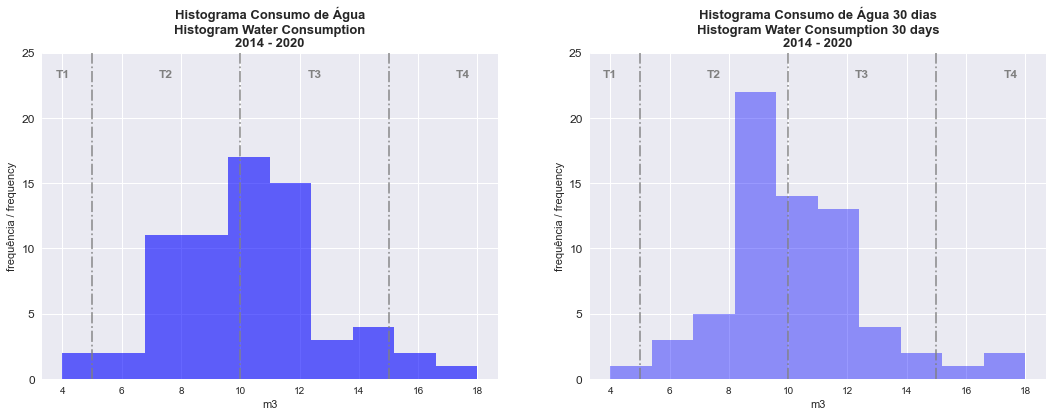

In [16]:
# define plot style
plt.style.use('seaborn')

# define axis label size
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=12)

# create the plot figure
fig = plt.figure(figsize=(18,6))

# create consumption histogram (left)
ax = fig.add_subplot(1,2,1)
ax.hist(df_water['consumption_m3'], bins=bins, color='b', alpha=0.6)
ax.set_title('Histograma Consumo de Água\nHistogram Water Consumption\n' + \
             min(df_water['year']) + ' - ' + max(df_water['year']), {'fontsize':13}, fontweight=900)

# get y-ticks from histogram
h1_locs, h1_labels = plt.yticks()

# create 30 days consumption histogram (right)
ax = fig.add_subplot(1,2,2)
ax.hist(df_water['consumption_30d_m3'], bins=bins, color='b', alpha=0.4)
ax.set_title('Histograma Consumo de Água 30 dias\nHistogram Water Consumption 30 days\n' + \
             min(df_water['year']) + ' - ' + max(df_water['year']), {'fontsize':13}, fontweight=900)

# get y-ticks from histogram
h2_locs, h2_labels = plt.yticks()

# take y-ticks with highest frequency
if max(h1_locs) > max(h2_locs):
    yticks_ = h1_locs
else:
    yticks_ = h2_locs

# loop to define similar settings for plots
for a in fig.axes:
    # set y-ticks and labels
    a.set_yticks(yticks_)
    a.set_ylabel('frequência / frequency')
    a.set_xlabel('m3')
    
    # loop to include tarrif ranges
    # note that not all tariff ranges should be on plot
    for t in wtariff:
        # add vertical line for tariffs within the consumption range
        if (wtariff[t][1] > min(bins)) & (wtariff[t][1] < max(bins)):
            a.axvline(x=wtariff[t][1], ymin=min(yticks_), ymax=max(yticks_), color='gray', alpha=0.8, ls='-.')

        # add caption for tariffs within the consumption range
        if (wtariff[t][0]>=min(bins) and wtariff[t][0]<=max(bins)) | (wtariff[t][1]>=min(bins) and wtariff[t][1]<=max(bins)):
            # define the x position
            if np.mean([wtariff[t][0],wtariff[t][1]]) < min(bins):
                xpos = min(bins)
            elif np.mean([wtariff[t][0],wtariff[t][1]]) > max(bins):
                xpos = max(bins)
            else:
                xpos = np.mean([wtariff[t][0],wtariff[t][1]])

            # add tariff caption
            a.annotate(t, xy=(xpos, max(yticks_)*0.925), xycoords='data', ha='center', color='gray', alpha=1.0, fontsize=12, fontweight=900)

# show plot
plt.show()

Check the consumption dynamics along the period with line plots.

Calculated the 12 months mean to be ploted.

In [17]:
# create empty list
mean12m = []

# calculate mean for last 12 observations of consumption_m3
for i in range(0, df_water.shape[0]):
    if i < 11:
        mean12m.append(round(np.mean(df_water.loc[:i,'consumption_m3']),3))
    else:
        mean12m.append(round(np.mean(df_water.loc[i-11:i,'consumption_m3']),3))

Define customized x-labels.

In [18]:
# define a variable to check for the first observation
i = True

# define an empty list
xlabels_ = []

# customize labels having the year only for the first onbservation and for each january
for y, m in zip(df_water['year'], df_water['month']):
    if i == True or m == '01':
        xlabels_.append(y+'-'+m)
        i = False
    else:
        xlabels_.append(m)

Define y-ticks and labels.

In [19]:
# get min and max consumption value
ymin = int(np.min([df_water['consumption_m3'].min(), df_water['consumption_30d_m3'].min()]))
ymax = int(np.max([df_water['consumption_m3'].max(), df_water['consumption_30d_m3'].max()]))

# define y labels
ylabels_ = np.arange(ymin-1, ymax+1, 2)

Create the plot.

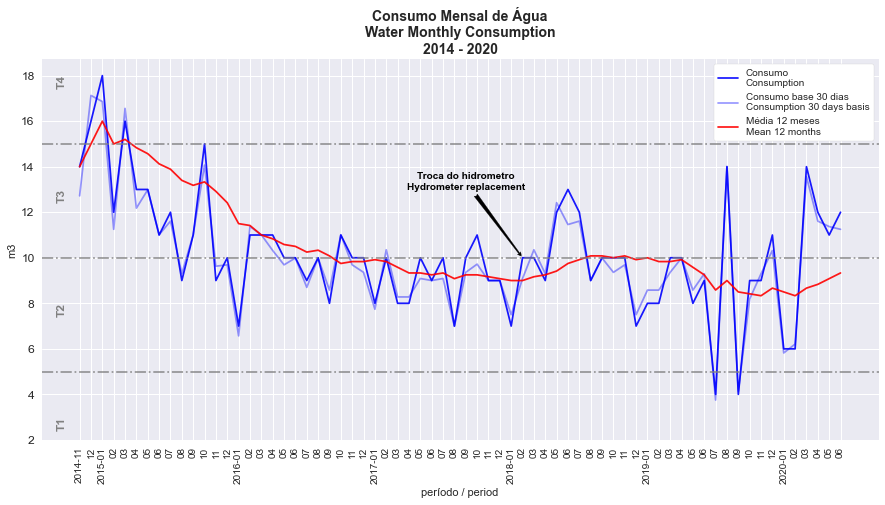

In [20]:
# create the plot figure
fig, ax = plt.subplots(figsize=(15,7))

# plot consumption_m3, consumption_30d_m3 and mean12m
ax.plot(df_water['period'], df_water['consumption_m3'], color='b', alpha=0.9,
        label='Consumo\nConsumption')
ax.plot(df_water['period'], df_water['consumption_30d_m3'], color='b', alpha=0.4, 
        label='Consumo base 30 dias\nConsumption 30 days basis')
ax.plot(df_water['period'], mean12m, color='r', alpha=0.9, 
        label='Média 12 meses\nMean 12 months')

# define plot title and axis labels
ax.set_title('Consumo Mensal de Água\nWater Monthly Consumption\n' \
             + min(df_water['year']) + ' - ' + max(df_water['year']), {'fontsize':14}, fontweight=900)
ax.set_ylabel('m3')
ax.set_xlabel('período / period')

# define legend
ax.legend(loc=1, frameon=True, facecolor='white', framealpha=1)

# define y and x-ticks
plt.yticks(ylabels_, ylabels_)
plt.xticks(np.arange(0, len(xlabels_), 1), xlabels_, rotation=90)

# loop to include tariff ranges
for t in wtariff:
    # add horizontal line for tariffs within the consumption range
    if (wtariff[t][1] > min(bins)) & (wtariff[t][1] < max(bins)):
        ax.axhline(y=wtariff[t][1], xmin=0, xmax=1, color='gray', alpha=0.8, ls='-.')

    # add caption for tariffs within the consumption range
    if (wtariff[t][0]>=min(ylabels_) and wtariff[t][0]<=max(ylabels_)) | (wtariff[t][1]>=min(ylabels_) and wtariff[t][1]<=max(ylabels_)):
        # define the y position
        if np.mean([wtariff[t][0],wtariff[t][1]]) < min(ylabels_):
            ypos = min(ylabels_)
        elif np.mean([wtariff[t][0],wtariff[t][1]]) > max(ylabels_):
            ypos = max(ylabels_)
        else:
            ypos = np.mean([wtariff[t][0],wtariff[t][1]])

        # add tariff caption
        ax.annotate(t, xy=(-2, ypos), xycoords='data', ha='left', rotation='vertical', color='gray', fontsize=12, fontweight=900)

# add hydrometer replacement with arrow
ax.annotate('Troca do hidrometro\nHydrometer replacement',
            xy=(hmrepl[0],hmrepl[1]), xycoords='data',
            xytext=(hmrepl[0]-5,hmrepl[1]+3), textcoords='data', color='black', ha='center', fontweight=900,
            arrowprops=dict(color='black',arrowstyle='fancy', connectionstyle='arc3'))

# show plot
plt.show()

Water consumption has decreased since 2014, achieving the lowest level during the second half of 2019. Analyse the consumption mean per month with bar plot, comparing *consumption_m3* and *consumption_30d_m3*.

Create a dataframe grouped by month calculating the mean for required columns, and calculate the overall mean and standard deviation only for the *consumption_m3*.

In [21]:
# create a dataframe with mean per month
df_mean = df_water[['month','consumption_m3','consumption_30d_m3']].groupby('month').mean().reset_index()

# round values to 3 decimal positions
df_mean['consumption_m3'] = df_mean['consumption_m3'].apply(lambda v: round(v,3))
df_mean['consumption_30d_m3'] = df_mean['consumption_30d_m3'].apply(lambda v: round(v,3))

# calculate overall mean and std for consumption_m3
meanconsum = round(np.mean(df_mean['consumption_m3']),3)
stdconsum = round(np.std(df_mean['consumption_m3']),3)

# show results
print('Overall mean for column consumption_m3: {:.3f}\nOverall std for column consumption_m3: {:.3f}\n'.
      format(meanconsum, stdconsum))

df_mean

Overall mean for column consumption_m3: 10.125
Overall std for column consumption_m3: 0.843



,month,consumption_m3,consumption_30d_m3
0,01,9.000,8.845
1,02,9.500,9.475
2,03,11.500,11.520
3,04,10.500,10.280
4,05,10.667,10.690
5,06,10.667,10.335
6,07,9.400,8.952
7,08,9.800,9.858
8,09,8.600,8.616
9,10,11.200,10.470


Create the plot.

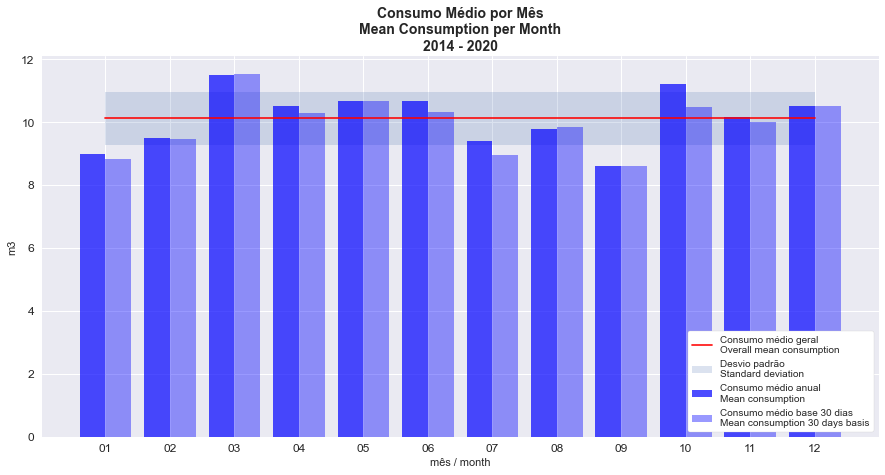

In [22]:
# redefine axis label size
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

# create the plot figure
fig, ax = plt.subplots(figsize=(15,7))

# define x-labels locations and bars with
x = np.arange(df_mean.shape[0])
width = 0.4

# plot mean consumption_m3, mean consumption_30d_m3, overall mean and std
ax.bar(x - width/2, df_mean['consumption_m3'], width, color='b', alpha=0.7, 
       label='Consumo médio anual\nMean consumption')
ax.bar(x + width/2, df_mean['consumption_30d_m3'], width, color='b', alpha=0.4, 
       label='Consumo médio base 30 dias\nMean consumption 30 days basis')
ax.plot(df_mean['month'], np.repeat(meanconsum, df_mean.shape[0]), color='r', alpha=0.9, 
        label='Consumo médio geral\nOverall mean consumption')
ax.fill_between(df_mean['month'], meanconsum-stdconsum, meanconsum+stdconsum, alpha=0.2, 
                label='Desvio padrão\nStandard deviation')

# define legend
ax.legend(loc=4, frameon=True, facecolor='white', framealpha=1)

# define plot title and axis labels
plt.title('Consumo Médio por Mês\nMean Consumption per Month\n' + 
          min(df_water['year']) + ' - ' + max(df_water['year']), {'fontsize':14}, fontweight=900)
plt.ylabel('m3')
plt.xlabel('mês / month')

# show plot
plt.show()

For further analysis only columns *period*, converted to ```datetime``` format, and *consumption_day_m3* are required. A new dataframe will be created having only required columns.

In [23]:
# create a new dataframe
features_water = df_water[['period','consumption_day_m3']].copy()

# convert period to datetime format
features_water['period'] = pd.to_datetime(features_water['period'], format='%Y-%m')

# rename column consumption_day_m3
features_water = features_water.rename(columns={'consumption_day_m3': 'water_day_m3'})

features_water

,period,water_day_m3
0,2014-11-01,0.424
1,2014-12-01,0.571
2,2015-01-01,0.562
3,2015-02-01,0.375
4,2015-03-01,0.552
...,...,...
63,2020-02-01,0.207
64,2020-03-01,0.452
65,2020-04-01,0.387
66,2020-05-01,0.379


Export dataframe to local file in ```feather``` format to be retrieved later on. 

In [24]:
# export to feather file format
features_water.to_feather('./Data_source/Features_Water.feather')